In [1]:
import sys
import os
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
sys.path.insert(0, str(root_dir))

import spatialzoomer as sz
import scanpy as sc
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

C:\Users\fyh\AppData\Roaming\Python\Python39\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


## read h5ad data processed by SpatialZoomer

In [2]:
dataset = "Xenium_Prime_Ovarian_Cancer_FFPE"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")

# use cell type labels from the original dataset
celltype = pd.read_csv("E:/SZ/Results/" + dataset + "/Xenium_Prime_Ovarian_Cancer_FFPE_cell_groups.csv")
obs_df = ad.obs.copy()
merged_df = obs_df.merge(celltype[['cell_id', 'group']], on='cell_id', how='left')
ad.obs = merged_df
ad.obs['Cell_Type'] = ad.obs['group']
ad

AnnData object with n_obs × n_vars = 397855 × 5099
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'Kmeans_scale0.6', 'leiden_scale0.6_res0.4', 'leiden_scale0.6_res0.6', 'leiden_scale0.6_res0.8', 'leiden_scale0.6_res1', 'leiden_scale0.6_res1.2', 'Kmeans_scale1.2', 

## Instantiation SubclusterAnalysis object

In [7]:
save_path = "./results/" + dataset + "_lowres/"
subcluster_analyzer = sz.SubclusterAnalysis(ad, save_path, cluster_key="Cell_Type")

## Detect the cluster with potential of further dividing

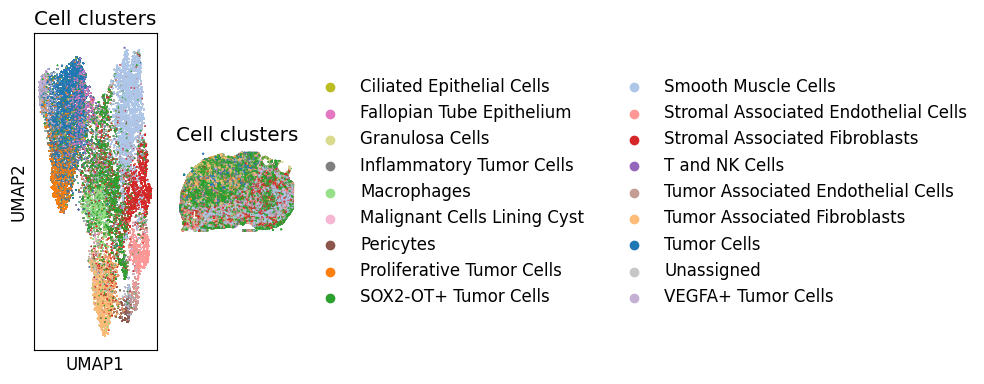

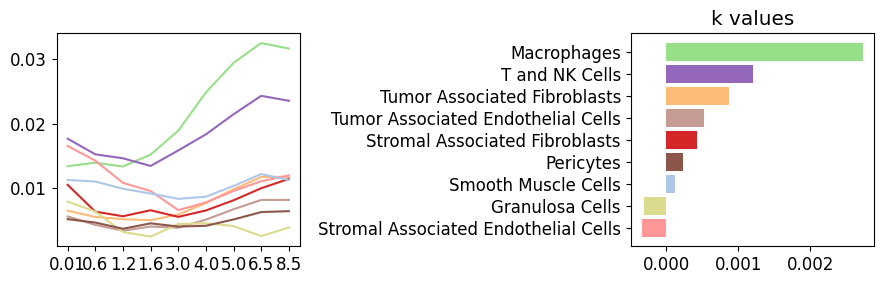

Suggested cluster:  Macrophages


In [ ]:
subcluster_analyzer.calculate_metrics(nonepi=True, figsize)

## Select a cluster to analyze

Selected cluster: Tumor Associated Fibroblasts


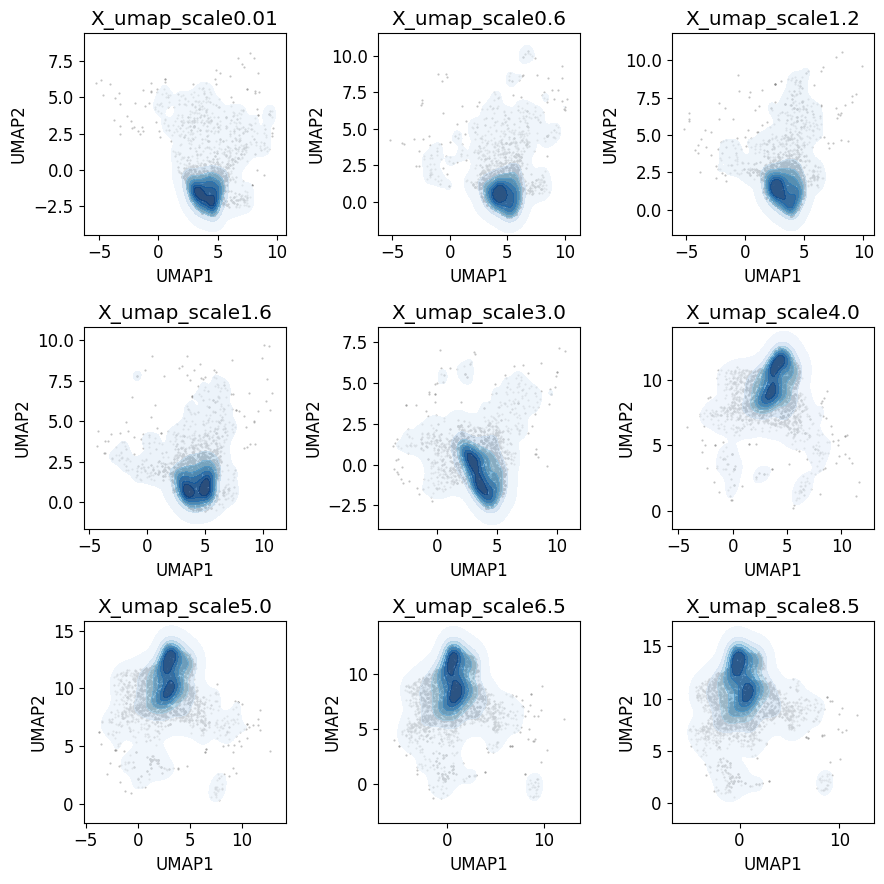

In [9]:
subcluster_analyzer.selected_cluster = "Tumor Associated Fibroblasts"
subcluster_analyzer.kde_plot()

In [10]:
subcluster_analyzer.find_optimal_scale()

Optimal scale for cluster Tumor Associated Fibroblasts is 6.5


##  identify subclusters at the optimal scale

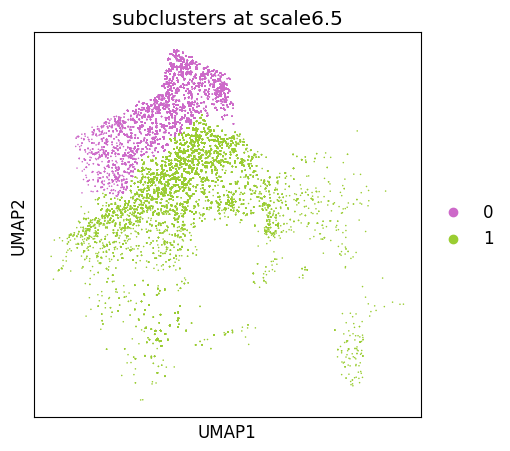

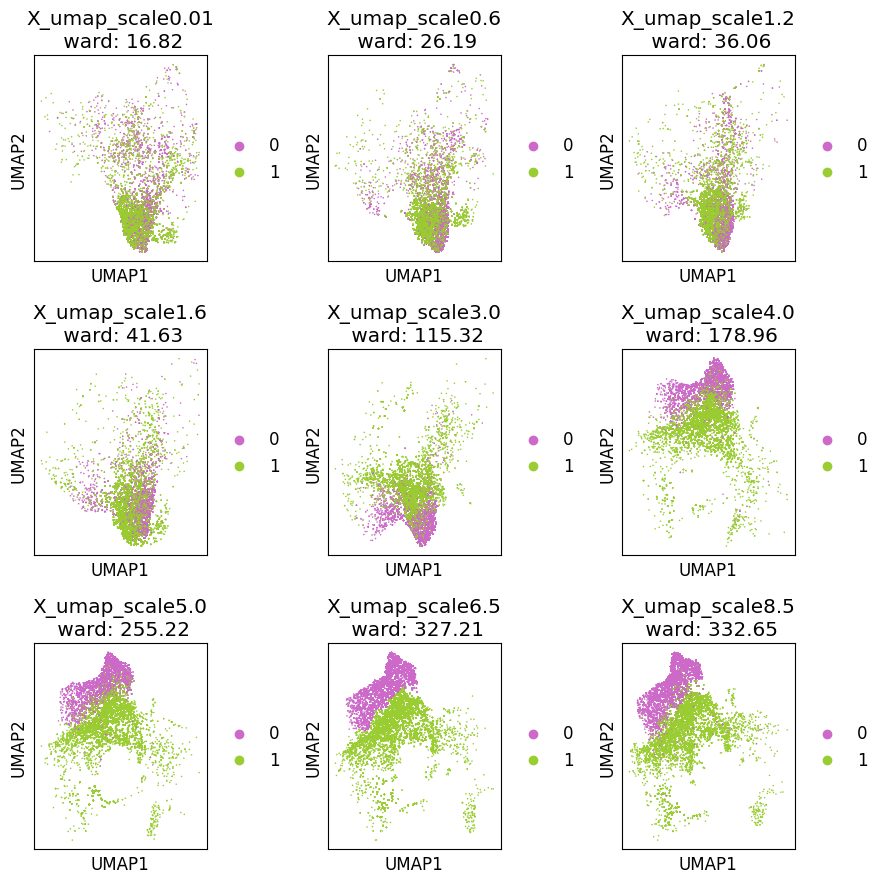

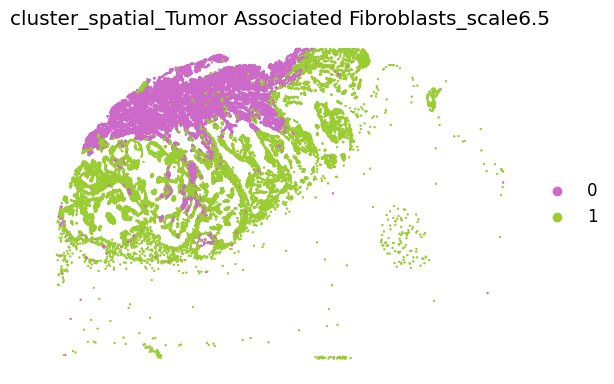

In [11]:
# # manually set the optimal scale here, if not, automatically set as the suggested one
# subcluster_analyzer.optimal_scale = 4.5
subcluster_analyzer.detect_subclusters(n_clusters=2, plot_all_scales=True, calculate_ward=True, plot_spatial=True)

## Differential analysis between subclusters

saving DEG results for subcluster 0
saving DEG results for subcluster 1


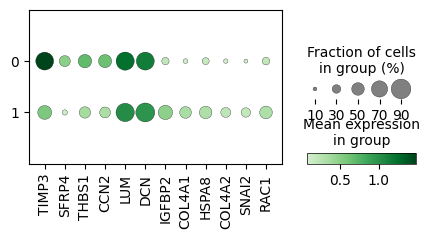

In [12]:
# DEGs analysis
subcluster_analyzer.deg_analysis_subclusters(dotplot=True)

Saving cell type labels with subcluster labels...


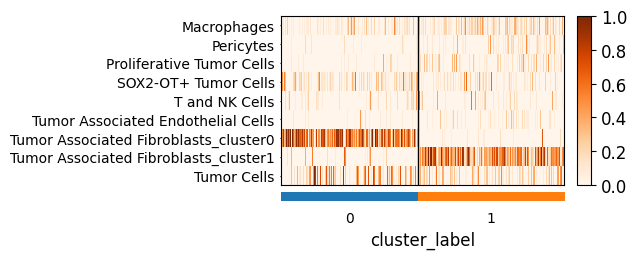

In [13]:
# spatial neighborhood analysis
subcluster_analyzer.neighborhood_analysis(k=10)

In [14]:
# save processed h5ad files
subcluster_analyzer.ad.write(save_path + "ad_processed.h5ad")
subcluster_analyzer.ad_selected.write(save_path + "ad_selected.h5ad")
subcluster_analyzer.ad_selected_plot.write(save_path + "ad_selected_plot.h5ad")